<a href="https://colab.research.google.com/github/TomekGniazdowski/convolutional-neural-network/blob/main/sieci_konwolucyjne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

In [4]:
# dane treningowe, testowe
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [5]:
# X_train - 50.000 obrazów 32x32 z 3 kanałami (RGB)
# y_train - wektor 50.000 elemnentów zawieracjący do jakiej klasy należy obeikt
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [6]:
print(X_train[0])
print(y_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
[6]


In [7]:
# zmiana wymiaru do wekotra
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
print(y_train)

[6 9 9 ... 9 1 1]


In [8]:
# klasy obiektów
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

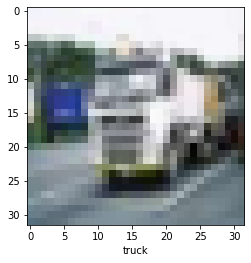

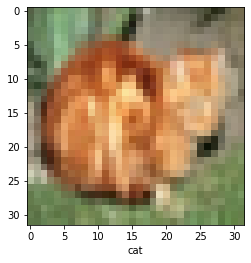

In [9]:
def show_image(index):
  img = X_train[index]
  plt.imshow(img)
  plt.xlabel(classes[y_train[index]])
  plt.show()

show_image(1000)
show_image(1100)

In [10]:
# normalizacja pikseli do zakresu 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
# model relu(3k) -> relu(1k) -> sigmoid(10)
# categorical_crossentropy -> [0, 0, 0, 1, 0, 0]
# sparse_categorical_crossentropy -> 4
# zwykla siec neuronowa
ann = models.Sequential([
    layers.Flatten(input_shape = (32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics='accuracy')
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9219 - accuracy: 0.3079
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6496 - accuracy: 0.4178
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5567 - accuracy: 0.4517
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4910 - accuracy: 0.4764
Epoch 5/5
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4296 - accuracy: 0.4990


In [12]:
predictions = ann.predict(X_test)
# zapis predykcji do wektora
predictions = [np.argmax(element) for element in predictions]
print(metrics.classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.57      0.51      0.54      1118
           1       0.46      0.73      0.56       633
           2       0.43      0.32      0.37      1344
           3       0.16      0.38      0.23       423
           4       0.20      0.56      0.29       354
           5       0.59      0.29      0.39      2035
           6       0.41      0.60      0.48       681
           7       0.54      0.56      0.55       963
           8       0.72      0.51      0.60      1400
           9       0.56      0.54      0.55      1049

    accuracy                           0.46     10000
   macro avg       0.46      0.50      0.46     10000
weighted avg       0.53      0.46      0.47     10000



In [13]:
cnn = models.Sequential([
                         # cnn
                         layers.Conv2D(filters=32, kernel_size=(3, 3), activation = 'relu', input_shape = (32, 32, 3)),
                         layers.MaxPooling2D((2, 2)),

                         layers.Conv2D(filters=32, kernel_size=(3, 3), activation = 'relu', input_shape = (32, 32, 3)),
                         layers.MaxPooling2D((2, 2)),

                         # dense
                         layers.Flatten(),
                         layers.Dense(64, activation='relu'),
                         layers.Dense(10, activation='softmax'),
])
# softmax - wyjscie znormalizowane
# sigmoid - nieznormalizowane

In [14]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 7s 3ms/step - loss: 1.7528 - accuracy: 0.3618
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2251 - accuracy: 0.5678
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0865 - accuracy: 0.6174
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9960 - accuracy: 0.6533
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9459 - accuracy: 0.6699
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9023 - accuracy: 0.6845
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8364 - accuracy: 0.7077
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8082 - accuracy: 0.7175
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7736 - accuracy: 0.7269
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.743

In [15]:
predictions_cnn = cnn.predict(X_test)
predictions_cnn = [np.argmax(element) for element in predictions_cnn]
print(metrics.classification_report(predictions_cnn, y_test))

              precision    recall  f1-score   support

           0       0.76      0.66      0.71      1154
           1       0.79      0.82      0.80       967
           2       0.49      0.63      0.55       779
           3       0.44      0.52      0.47       840
           4       0.57      0.65      0.61       881
           5       0.65      0.55      0.60      1178
           6       0.72      0.81      0.76       886
           7       0.81      0.64      0.71      1262
           8       0.83      0.75      0.79      1114
           9       0.75      0.80      0.77       939

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.70      0.68      0.68     10000

